In [338]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen:

In [339]:
delta_nu = pd.read_csv('tables/winkel.csv')
print(delta_nu) 

   mean_nu/Hz  -15   30   45
0          33   34  -45   74
1          50   60 -124  192
2          66  140 -186  321
3          83  202 -377  563
4         100  221 -552  803


Strömungsgeschwindigkeiten berrechnen:

In [340]:
np.savetxt('tables/delta_nu.txt', delta_nu.values, header='f/Hz U/V', fmt='%.3f')
P, dnu15, dnu30, dnu60 = np.genfromtxt('tables/delta_nu.txt', unpack=True, skip_header=1)

alpha = [80.06, 70.53, 54.74]   # Prismenwinkel
alpha = np.multiply(alpha, (np.pi/180)) 
c = const.speed_of_light
nu0 = 2e6   # 2 MHz

def v(nu, a):
    return (nu * c)/(2 * nu0 * np.cos(a)) /1e5

v15 = np.zeros(5)
v30 = np.zeros(5)
v60 = np.zeros(5)

for j in range(5):
    v15[j] = v(dnu15[j], alpha[0])
    v30[j] = v(dnu30[j], alpha[1])
    v60[j] = v(dnu60[j], alpha[2])

f = {'v15/m/s': np.around(v15, 3), 'v30/m/s': np.around(v30, 3), 'v60/m/s': np.around(v60, 3)}
df = pd.DataFrame(data = f)
print(df.to_latex(index = False, column_format= "c c c", decimal=',')) 

\begin{tabular}{c c c}
\toprule
 v15/m/s &  v30/m/s &  v60/m/s \\
\midrule
   0,148 &   -0,101 &    0,096 \\
   0,261 &   -0,279 &    0,249 \\
   0,608 &   -0,418 &    0,417 \\
   0,877 &   -0,848 &    0,731 \\
   0,960 &   -1,241 &    1,043 \\
\bottomrule
\end{tabular}



$\frac{\Delta \nu}{\cos (\alpha)} (v)$-Diagramme:

15°:

/home/erich/.local/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(0.0, 0.014)

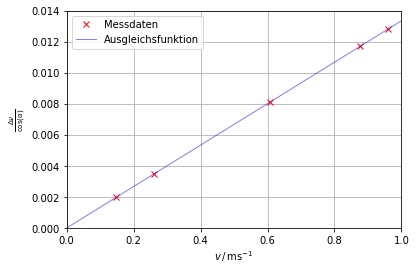

In [341]:
def f(v):
    return (2 * nu0 * v)/c

plt.plot(v15, f(v15), 'xr', markersize=6 , label = 'Messdaten')

# Ausgleichsrechung
def g(x, a, b):
    return a*x + b

para, pcov = curve_fit(g, v15, f(v15))
a, b = para
fa, fb = np.sqrt(np.diag(pcov))
ua = ufloat(a, fa) 
ub = ufloat(b, fb)

xx = np.linspace(0, 1, 10**4)
plt.plot(xx, g(xx, a, b), '-b', linewidth = 1, label = 'Ausgleichsfunktion', alpha=0.5)

plt.xlabel(r'$v \, / \, \mathrm{ms^{-1}}$')
plt.ylabel(r'$\frac{\Delta \nu}{\cos (\alpha)}$')
plt.legend(loc="best")                  
plt.grid(True)                          
plt.xlim(0, 1)                  
plt.ylim(0, 0.014)

30°:

(0.0, 0.018)

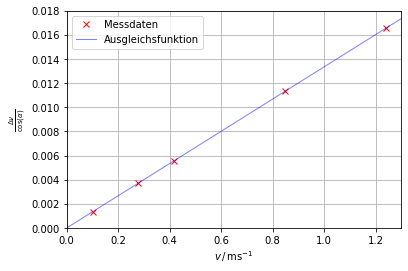

In [342]:
v30 = abs(v30)
plt.plot(v30, f(v30), 'xr', markersize=6 , label = 'Messdaten')

# Ausgleichsrechung
para, pcov = curve_fit(g, v30, f(v30))
a, b = para
fa, fb = np.sqrt(np.diag(pcov))
ua = ufloat(a, fa) 
ub = ufloat(b, fb)

xx = np.linspace(0, 1.4, 10**4)
plt.plot(xx, g(xx, a, b), '-b', linewidth = 1, label = 'Ausgleichsfunktion', alpha=0.5)

plt.xlabel(r'$v \, / \, \mathrm{ms^{-1}}$')
plt.ylabel(r'$\frac{\Delta \nu}{\cos (\alpha)}$')
plt.legend(loc="best")                  
plt.grid(True)                          
plt.xlim(0, 1.3)                  
plt.ylim(0, 0.018)

60°:

(0.0, 0.015)

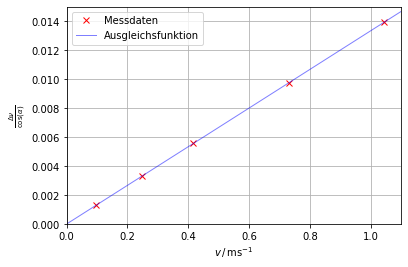

In [343]:
plt.plot(v60, f(v60), 'xr', markersize=6 , label = 'Messdaten')

# Ausgleichsrechung
para, pcov = curve_fit(g, v60, f(v60))
a, b = para
fa, fb = np.sqrt(np.diag(pcov))
ua = ufloat(a, fa) 
ub = ufloat(b, fb)

xx = np.linspace(0, 1.4, 10**4)
plt.plot(xx, g(xx, a, b), '-b', linewidth = 1, label = 'Ausgleichsfunktion', alpha=0.5)

plt.xlabel(r'$v \, / \, \mathrm{ms^{-1}}$')
plt.ylabel(r'$\frac{\Delta \nu}{\cos (\alpha)}$')
plt.legend(loc="best")                  
plt.grid(True)                          
plt.xlim(0, 1.1)                  
plt.ylim(0, 0.015)

#### Strömungsprofile bestimmen:

70% Leistung:

In [344]:
p75 = pd.read_csv('tables/75p.csv')
np.savetxt('tables/p75.txt', p75.values, header='x_sec/micros delta_nu/Hz I_s/V^2/s', fmt='%.3f')
x_sec, dnu75, I75 = np.genfromtxt('tables/p75.txt', unpack=True, skip_header=1)
x_mm = (10/4) * x_sec
f = {'x_sec': x_sec, 'x_mm': x_mm, 'dnu': dnu75, 'I70': I75}
df = pd.DataFrame(data = f)
print(df.to_latex(index = False, column_format= "c c c c", decimal=','))

\begin{tabular}{c c c c}
\toprule
 x\_sec &  x\_mm &   dnu &   I70 \\
\midrule
  12,0 & 30,00 &   0,0 &  20,0 \\
  12,5 & 31,25 & 206,0 &  40,0 \\
  13,0 & 32,50 & 209,0 &  59,0 \\
  13,5 & 33,75 & 220,0 &  65,0 \\
  14,0 & 35,00 & 208,0 &  74,0 \\
  14,5 & 36,25 & 223,0 &  82,0 \\
  15,0 & 37,50 & 210,0 &  99,0 \\
  15,5 & 38,75 & 209,0 & 117,0 \\
  16,0 & 40,00 & 229,0 & 140,0 \\
  16,5 & 41,25 & 211,0 & 130,0 \\
  17,0 & 42,50 & 190,0 &  88,0 \\
  17,5 & 43,75 & 189,0 &  52,0 \\
  18,0 & 45,00 &   0,0 &  27,0 \\
  18,5 & 46,25 &   0,0 &  19,0 \\
  19,0 & 47,50 &   0,0 &  17,0 \\
\bottomrule
\end{tabular}



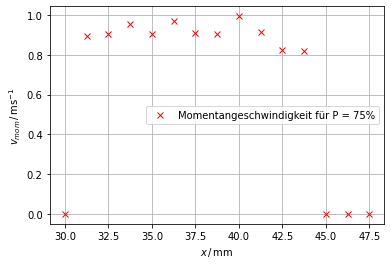

In [345]:
v75 = np.zeros(15)

for j in range(15):
    v75[j] = v(dnu75[j], alpha[0])

plt.plot(x_mm, v75, 'xr', markersize=6 , label = 'Momentangeschwindigkeit für P = 75%')

plt.xlabel(r'$x \, / \, \mathrm{mm}$')
plt.ylabel(r'$v_{mom} \, / \, \mathrm{ms^{-1}}$')
plt.legend(loc="best")                  
plt.grid(True)

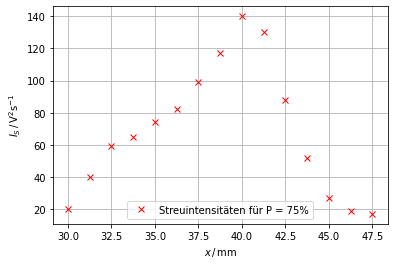

In [346]:
plt.plot(x_mm, I75, 'xr', markersize=6 , label = 'Streuintensitäten für P = 75%')
plt.xlabel(r'$x \, / \, \mathrm{mm}$')
plt.ylabel(r'$I_S \, / \, \mathrm{V^2 s^{-1}}$')
plt.legend(loc="best")                  
plt.grid(True) 

40% Leistung:

In [347]:
p45 = pd.read_csv('tables/45p.csv')
np.savetxt('tables/p45.txt', p45.values, header='x_sec/micros delta_nu/Hz I_s/V^2/s', fmt='%.3f')
x_sec, dnu45, I45 = np.genfromtxt('tables/p45.txt', unpack=True, skip_header=1)
f = {'x_sec': x_sec, 'x_mm': x_mm, 'dnu': dnu45, 'I70': I45}
df = pd.DataFrame(data = f)
print(df.to_latex(index = False, column_format= "c c c c", decimal=','))

\begin{tabular}{c c c c}
\toprule
 x\_sec &  x\_mm &  dnu &   I70 \\
\midrule
  12,0 & 30,00 &  0,0 &   5,0 \\
  12,5 & 31,25 &  0,0 &  18,0 \\
  13,0 & 32,50 &  0,0 &  24,0 \\
  13,5 & 33,75 & 84,0 &  51,0 \\
  14,0 & 35,00 & 78,0 &  60,0 \\
  14,5 & 36,25 & 83,0 &  73,0 \\
  15,0 & 37,50 & 82,0 &  81,0 \\
  15,5 & 38,75 & 82,0 & 102,0 \\
  16,0 & 40,00 & 82,0 &  71,0 \\
  16,5 & 41,25 & 82,0 &  69,0 \\
  17,0 & 42,50 & 68,0 &  39,0 \\
  17,5 & 43,75 &  0,0 &  14,0 \\
  18,0 & 45,00 &  0,0 &   9,0 \\
  18,5 & 46,25 &  0,0 &   8,0 \\
  19,0 & 47,50 &  0,0 &   7,0 \\
\bottomrule
\end{tabular}



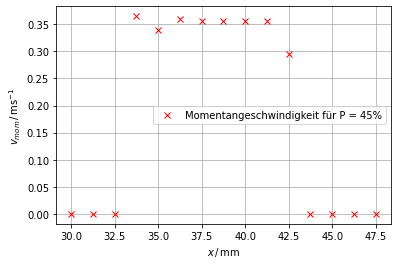

In [348]:
v45 = np.zeros(15)

for j in range(15):
    v45[j] = v(dnu45[j], alpha[0])

plt.plot(x_mm, v45, 'xr', markersize=6 , label = 'Momentangeschwindigkeit für P = 45%')

plt.xlabel(r'$x \, / \, \mathrm{mm}$')
plt.ylabel(r'$v_{mom} \, / \, \mathrm{ms^{-1}}$')
plt.legend(loc="best")                  
plt.grid(True)

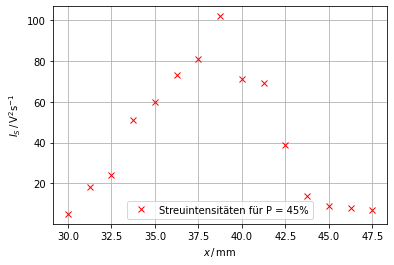

In [349]:
plt.plot(x_mm, I45, 'xr', markersize=6 , label = 'Streuintensitäten für P = 45%')
plt.xlabel(r'$x \, / \, \mathrm{mm}$')
plt.ylabel(r'$I_S \, / \, \mathrm{V^2 s^{-1}}$')
plt.legend(loc="best")                  
plt.grid(True) 